# STOR 320: Introduction to Data Science
## Group 13

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
## column names check (1 point)

In [3]:
math_df = pd.read_csv('data/Math.csv')
portuguese_df = pd.read_csv('data/Portuguese.csv')

In [4]:
column_names = {
    'data/Math.csv': math_df.columns.tolist(),
    'data/Portuguese.csv': portuguese_df.columns.tolist(),
}

# Organize column names into a table format
columns_names = pd.DataFrame.from_dict(column_names, 
                                       orient='index').transpose()
columns_names = columns_names.fillna('')  
columns_names = columns_names[['data/Math.csv', 'data/Portuguese.csv']]

columns_names

,data/Math.csv,data/Portuguese.csv
0,school,school
1,sex,sex
2,age,age
3,address,address
4,famsize,famsize
5,Pstatus,Pstatus
6,Medu,Medu
7,Fedu,Fedu
8,Mjob,Mjob
9,Fjob,Fjob


In [5]:
## missing data check (1 point)

In [6]:
missing_data = {
    'data/Math.csv': math_df.isnull().sum(),
    'data/Portuguese.csv': portuguese_df.isnull().sum(),
}

missing_data_table = pd.DataFrame(missing_data).rename_axis('Column').reset_index()
missing_data_table = missing_data_table[['data/Math.csv', 
                                         'data/Portuguese.csv']]

# Adjust the table format to clearly display each column name
missing_data_table = pd.DataFrame(missing_data).rename_axis('Column Name').reset_index()
missing_data_table

,Column Name,data/Math.csv,data/Portuguese.csv
0,school,0,0
1,sex,0,0
2,age,0,0
3,address,0,0
4,famsize,0,0
5,Pstatus,0,0
6,Medu,0,0
7,Fedu,0,0
8,Mjob,0,0
9,Fjob,0,0


In [7]:
## Outlier check (1 point)

In [8]:
# use the IQR method to identify outliers in each numerical column.
def detect_outliers(data):
    outlier_info = {}
    for column in data.select_dtypes(include='number').columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] 
                         < lower_bound) | (data[column] > 
                                                        upper_bound)]
        outlier_info[column] = len(outliers)
    return outlier_info

# Perform outlier detection for each dataset
outlier_data = {
    'data/Math.csv': detect_outliers(math_df),
    'data/Portuguese.csv': detect_outliers(portuguese_df)
}

# Convert the outlier detection results into a table for clarity
outlier_table = pd.DataFrame(outlier_data).fillna(
    0).astype(
    int).rename_axis('Column').reset_index()

outlier_table

,Column,data/Math.csv,data/Portuguese.csv
0,age,1,1
1,Medu,0,0
2,Fedu,2,0
3,traveltime,8,16
4,studytime,27,35
5,failures,84,100
6,famrel,26,51
7,freetime,19,45
8,goout,0,0
9,Dalc,18,34


In [9]:
math_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      397 non-null    object
 1   sex         397 non-null    object
 2   age         397 non-null    int64 
 3   address     397 non-null    object
 4   famsize     397 non-null    object
 5   Pstatus     397 non-null    object
 6   Medu        397 non-null    int64 
 7   Fedu        397 non-null    int64 
 8   Mjob        397 non-null    object
 9   Fjob        397 non-null    object
 10  reason      397 non-null    object
 11  guardian    397 non-null    object
 12  traveltime  397 non-null    int64 
 13  studytime   397 non-null    int64 
 14  failures    397 non-null    int64 
 15  schoolsup   397 non-null    object
 16  famsup      397 non-null    object
 17  paid        397 non-null    object
 18  activities  397 non-null    object
 19  nursery     397 non-null    object
 20  higher    

In [10]:
portuguese_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      651 non-null    object
 1   sex         651 non-null    object
 2   age         651 non-null    int64 
 3   address     651 non-null    object
 4   famsize     651 non-null    object
 5   Pstatus     651 non-null    object
 6   Medu        651 non-null    int64 
 7   Fedu        651 non-null    int64 
 8   Mjob        651 non-null    object
 9   Fjob        651 non-null    object
 10  reason      651 non-null    object
 11  guardian    651 non-null    object
 12  traveltime  651 non-null    int64 
 13  studytime   651 non-null    int64 
 14  failures    651 non-null    int64 
 15  schoolsup   651 non-null    object
 16  famsup      651 non-null    object
 17  paid        651 non-null    object
 18  activities  651 non-null    object
 19  nursery     651 non-null    object
 20  higher    

In [11]:
## data merging (1 point)

In [12]:
# Since math_df and portuguese_df are subsets from the same data source with identical columns,
# we will merge them into a new DataFrame named merged_df.

In [13]:
# Add Student_ID column to both math_df and portuguguese_df
id_column = range(1, len(portuguese_df) + 1)
portuguese_df.insert(0, 'StudentID', id_column)

x_column = ['x' for _ in range(len(math_df))]
math_df.insert(0, 'StudentID', x_column)

In [14]:
# By observing the datasets, we found out students in two different datasets 
# have different response in `paid`, `failures`,`absences`, `G1`, `G2`, `G3`
# Gets only the columns used to identify the same student in both dataframes by dropping different rows
identifiers = math_df.columns[1:-4]
identifiers = np.delete(identifiers, np.where(np.isin(
    identifiers, ['failures', 'paid']))[0])

identifiers

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'],
      dtype='object')

In [15]:
# Iterate over each row in `math_df[identifiers]`
for i, row in math_df[identifiers].iterrows():
    match = portuguese_df[portuguese_df[identifiers].eq(row).all(axis=1)]
    
    # If there is a match, add the matching rows to the list
    if not match.empty:
        math_df.at[i, 'StudentID'] = portuguese_df.at[match.index[0], 
                                                      'StudentID']

math_df['StudentID'].value_counts()

StudentID
x      25
1       2
640     2
290     1
288     1
       ..
122     1
121     1
120     1
119     1
649     1
Name: count, Length: 371, dtype: int64

In [16]:
## Data Cleaning

# Therefore, there are 25 students that only take maths classes.
# We removed the 25 students and the duplicated rows. 
math_df = math_df[math_df['StudentID'] != 'x'].drop_duplicates(
    subset=['StudentID'], ignore_index=True)

math_dropped = math_df.drop(columns=identifiers)

# Merge the two datasets based on 'Student_ID'
merged_df = pd.merge(portuguese_df, 
                     math_dropped, 
                     on='StudentID', 
                     how='right', 
                     suffixes=('', '_math'))
merged_df

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,absences,G1,G2,G3,failures_math,paid_math,absences_math,G1_math,G2_math,G3_math
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,4,0,11,11,0,no,6,5,6,6
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,2,9,11,11,0,no,4,5,5,6
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,6,12,13,12,3,yes,10,7,8,10
3,4,GP,F,15,U,GT3,T,4,2,health,...,0,14,14,14,0,yes,2,15,14,15
4,5,GP,F,16,U,GT3,T,3,3,other,...,0,11,13,13,0,yes,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,645,MS,F,19,R,GT3,T,2,3,services,...,4,10,11,10,1,no,0,7,5,0
366,646,MS,F,18,U,LE3,T,3,1,teacher,...,4,15,15,16,0,yes,0,7,9,8
367,647,MS,F,18,U,GT3,T,1,1,other,...,6,11,12,9,1,no,0,6,5,0
368,648,MS,M,17,U,LE3,T,3,1,services,...,6,10,10,10,0,no,3,14,16,16


In [17]:
## data transformation, normalization, and cleaning (1 point)

In [18]:
# Rename `paid`, `failures`,`absences`, `G1`, `G2`, `G3` for Portuege
merged_df.rename(columns={
    'paid': 'paid_port',
    'failures': 'failures_port',
    'absences': 'absences_port',
    'G1': 'G1_port',
    'G2': 'G2_port',
    'G3': 'G3_port'}, inplace=True)

In [19]:
## Data transformation 

# Creating new columns

# Define new variable G1_GPA, G2_GPA, G3_GPA as the average GPA from two subjects of each student
merged_df['G1_GPA'] = merged_df[['G1_port', 'G1_math']].mean(axis=1)
merged_df['G2_GPA'] = merged_df[['G2_port', 'G2_math']].mean(axis=1)
merged_df['G3_GPA'] = merged_df[['G3_port', 'G3_math']].mean(axis=1)


# Caclulate the total absences and total failures
merged_df['Total_Absences'] = merged_df[['absences_port', 'absences_math']].sum(axis=1)
merged_df['Total_Failures']= merged_df[['failures_port', 
                                        'failures_math']].sum(axis=1)
merged_df

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,paid_math,absences_math,G1_math,G2_math,G3_math,G1_GPA,G2_GPA,G3_GPA,Total_Absences,Total_Failures
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,no,6,5,6,6,2.5,8.5,8.5,10,0
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,no,4,5,5,6,7.0,8.0,8.5,6,0
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,yes,10,7,8,10,9.5,10.5,11.0,16,3
3,4,GP,F,15,U,GT3,T,4,2,health,...,yes,2,15,14,15,14.5,14.0,14.5,2,0
4,5,GP,F,16,U,GT3,T,3,3,other,...,yes,4,6,10,10,8.5,11.5,11.5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,645,MS,F,19,R,GT3,T,2,3,services,...,no,0,7,5,0,8.5,8.0,5.0,4,2
366,646,MS,F,18,U,LE3,T,3,1,teacher,...,yes,0,7,9,8,11.0,12.0,12.0,4,0
367,647,MS,F,18,U,GT3,T,1,1,other,...,no,0,6,5,0,8.5,8.5,4.5,6,1
368,648,MS,M,17,U,LE3,T,3,1,services,...,no,3,14,16,16,12.0,13.0,13.0,9,0


In [20]:
merged_df.columns

Index(['StudentID', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures_port', 'schoolsup', 'famsup', 'paid_port',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_port',
       'G1_port', 'G2_port', 'G3_port', 'failures_math', 'paid_math',
       'absences_math', 'G1_math', 'G2_math', 'G3_math', 'G1_GPA', 'G2_GPA',
       'G3_GPA', 'Total_Absences', 'Total_Failures'],
      dtype='object')

## Data Preparation for Models

In [21]:
# Convert numerical target variables into binary classfication variables
merged_df['G3_math_binary'] = (merged_df['G3_math'] >= 10).astype(int)
merged_df['G3_port_binary'] = (merged_df['G3_port'] >= 10).astype(int)


Math Class Distribution:
G3_math_binary
1    249
0    121
Name: count, dtype: int64

Portuguese Class Distribution:
G3_port_binary
1    341
0     29
Name: count, dtype: int64


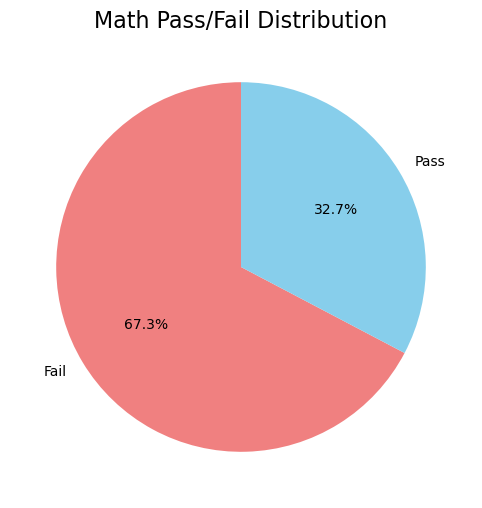

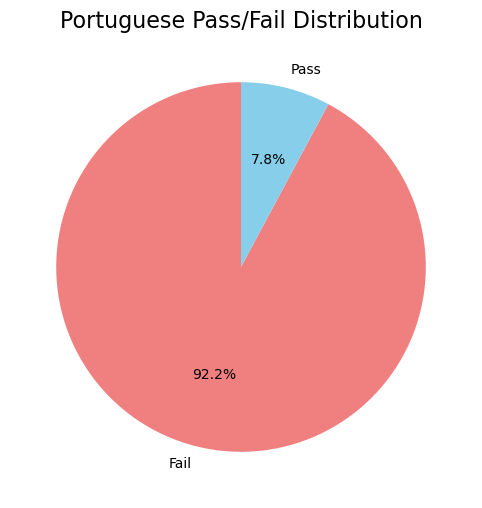

In [22]:
def print_class_distribution(data, column, subject_name):
    print(f"\n{subject_name} Class Distribution:")
    print(data[column].value_counts())

print_class_distribution(merged_df, 'G3_math_binary', 'Math')
print_class_distribution(merged_df, 'G3_port_binary', 'Portuguese')

def plot_class_distribution(data, column, subject_name):
    class_counts = data[column].value_counts()
    labels = ['Fail', 'Pass']  
    plt.figure(figsize=(8, 6))
    plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
    plt.title(f'{subject_name} Pass/Fail Distribution', fontsize=16)
    plt.show()

plot_class_distribution(merged_df, 'G3_math_binary', 'Math')
plot_class_distribution(merged_df, 'G3_port_binary', 'Portuguese')

In [23]:
binary_columns = ['schoolsup', 'famsup', 'famsize', 'Pstatus', 'internet', 'paid_math', 'paid_port']
binary_mappings = {
    'yes': 1, 'no': 0,
    'GT3': 1, 'LE3': 0,
    'T': 1, 'A': 0
}

for col in binary_columns:
    merged_df[col] = merged_df[col].replace(binary_mappings)

/var/folders/kd/12sv_k314bg7vhz1y7ch77cc0000gn/T/ipykernel_2174/969427741.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df[col] = merged_df[col].replace(binary_mappings)


In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
merged_df['guardian'] = label_encoder.fit_transform(merged_df['guardian'])

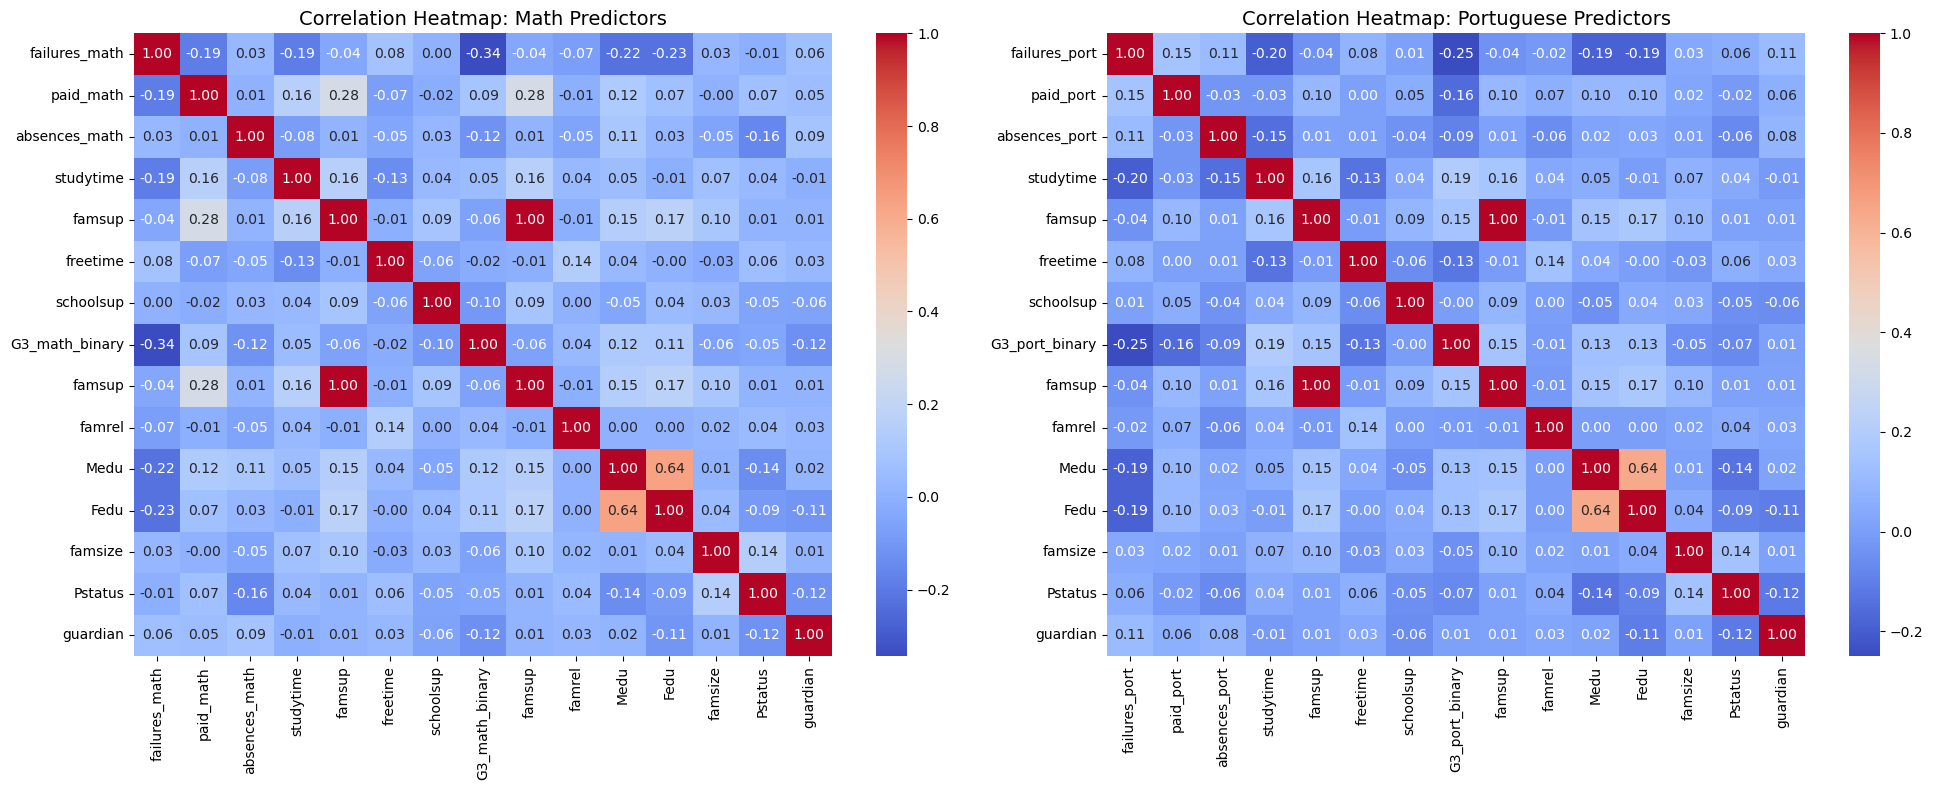

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

features_math = ['failures_math', 'paid_math', 'absences_math', 'studytime', 'famsup', 'freetime', 
                 'schoolsup', 'G3_math_binary', 'famsup', 'famrel', 'Medu', 'Fedu', 'famsize', 'Pstatus', 'guardian']
features_port = ['failures_port', 'paid_port', 'absences_port', 'studytime', 'famsup', 'freetime', 'schoolsup', 
                 'G3_port_binary', 'famsup', 'famrel', 'Medu', 'Fedu', 'famsize', 'Pstatus', 'guardian']

math_corr = merged_df[features_math].corr()
port_corr = merged_df[features_port].corr()

fig, axes = plt.subplots(1, 2, figsize=(20, 8)) 

sns.heatmap(math_corr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap: Math Predictors", fontsize=14)

sns.heatmap(port_corr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap: Portuguese Predictors", fontsize=14)

plt.tight_layout()
plt.show()

## Question 1:

How do students’ academic performances and study habits differ between Math and Portuguese classes?

In [26]:
# We use G3_math, G3_portuguese as our target variable
# We use studytime, schoolsup, famsup, failures_math, failures_portuguese, paid_math, 
# paid_portuguese, absences_math, absences_portuguese as our predictor variables

In [27]:
# We will use Random Forest since the predictor variables are 
# combined of binary, levels of classification and numerical variables

### Model 1: Random Forest 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [29]:
features_math = merged_df[['failures_math', 'paid_math', 'absences_math', 'studytime', 
                           'famsup', 'freetime', 'schoolsup']]
features_port = merged_df[['failures_port', 'paid_port', 'absences_port', 'studytime', 
                           'famsup', 'freetime', 'schoolsup']]

In [30]:
y_math = merged_df['G3_math_binary']
y_port = merged_df['G3_port_binary']

### Math

In [31]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm_model = SMOTE(random_state=42)
X_resampled_math, y_resampled_math = sm_model.fit_resample(features_math, y_math)
print('Resampled dataset shape %s' % Counter(y_resampled_math))

Resampled dataset shape Counter({0: 249, 1: 249})


In [32]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X_resampled_math, 
                                                    y_resampled_math, 
                                                    test_size=0.2, 
                                                    random_state=42)

print("Original class distribution:", Counter(y_train))

Original class distribution: Counter({1: 199, 0: 199})


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_math = RandomForestClassifier(random_state=42, n_estimators=100)
rf_math.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred = rf_math.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70        50
           1       0.70      0.66      0.68        50

    accuracy                           0.69       100
   macro avg       0.69      0.69      0.69       100
weighted avg       0.69      0.69      0.69       100



In [35]:
importance_math = pd.DataFrame({
    'Feature': features_math.columns,
    'Importance': rf_math.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nMath Feature Importance:")
print(importance_math)


Math Feature Importance:
         Feature  Importance
2  absences_math    0.375825
5       freetime    0.209877
3      studytime    0.137702
0  failures_math    0.118361
4         famsup    0.059571
1      paid_math    0.054567
6      schoolsup    0.044097


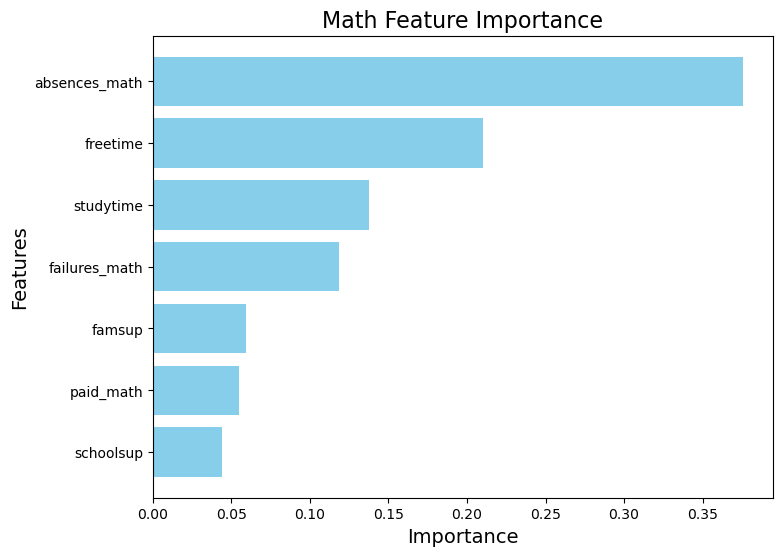

In [36]:
plt.figure(figsize=(8, 6))
plt.barh(importance_math['Feature'], importance_math['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Math Feature Importance', fontsize=16)
plt.gca().invert_yaxis()
plt.show()

### Portuguese

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled_port, y_resampled_port = smote.fit_resample(features_port, y_port)

X_train_port, X_test_port, y_train_port, y_test_port = train_test_split(
    X_resampled_port, y_resampled_port, test_size=0.2, random_state=42
)


rf_port = RandomForestClassifier(n_estimators=100, random_state=42)
rf_port.fit(X_train_port, y_train_port)

y_pred_port = rf_port.predict(X_test_port)
print("\nPortuguese Classification Report: ")
print(classification_report(y_test_port, y_pred_port))


Portuguese Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.83      0.73        52
           1       0.87      0.73      0.79        85

    accuracy                           0.77       137
   macro avg       0.76      0.78      0.76       137
weighted avg       0.79      0.77      0.77       137



In [38]:
importance_port = pd.DataFrame({
    'Feature': features_port.columns,
    'Importance': rf_port.feature_importances_
}).sort_values(by='Importance', ascending=False)


print("\nPortuguese Feature Importance:")
print(importance_port)


Portuguese Feature Importance:
         Feature  Importance
2  absences_port    0.309890
3      studytime    0.278431
4         famsup    0.203884
5       freetime    0.110799
0  failures_port    0.049146
1      paid_port    0.024454
6      schoolsup    0.023396


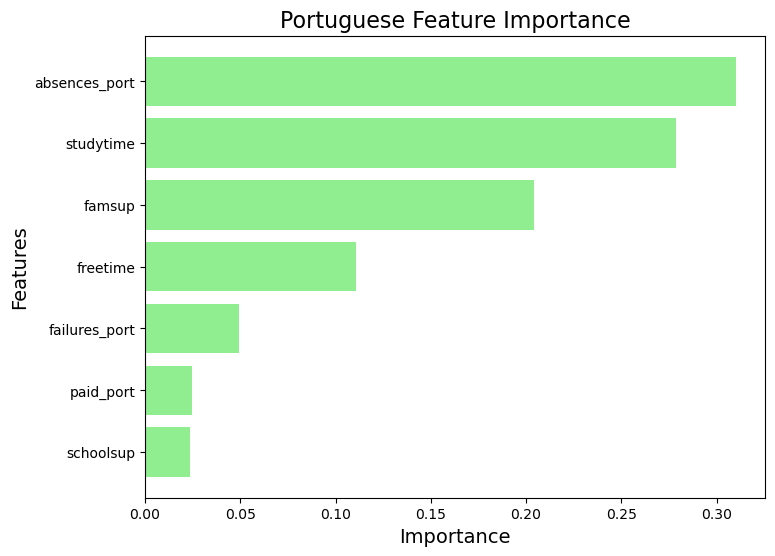

In [39]:
plt.figure(figsize=(8, 6))
plt.barh(importance_port['Feature'], importance_port['Importance'], color='lightgreen')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Portuguese Feature Importance', fontsize=16)
plt.gca().invert_yaxis()
plt.show()

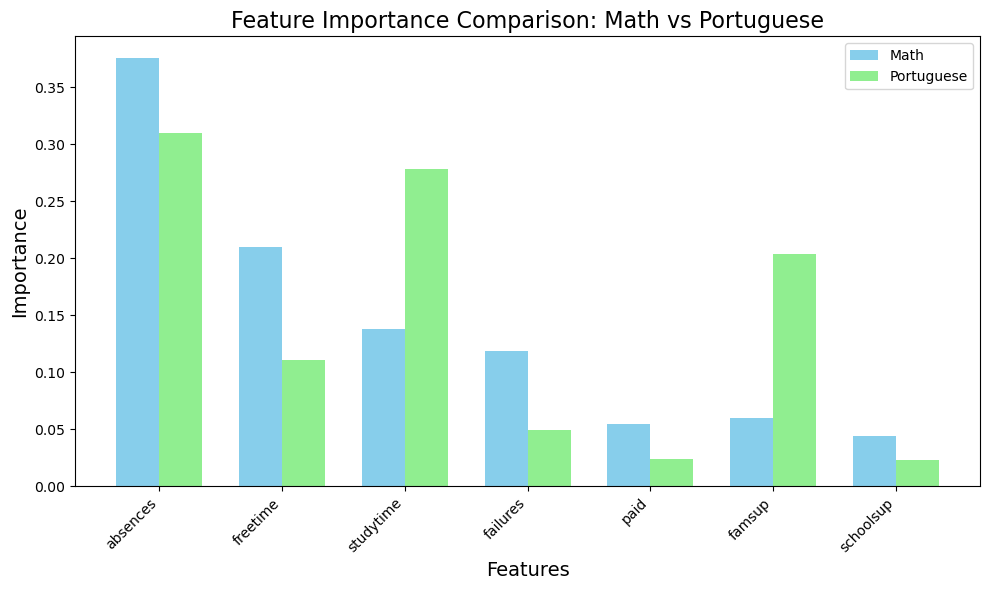

In [40]:
features = ['absences', 'freetime', 'studytime', 'failures', 'paid', 'famsup', 'schoolsup']

math_importance = importance_math.set_index(importance_math['Feature'].str.replace('_math', '')).reindex(features)['Importance']
port_importance = importance_port.set_index(importance_port['Feature'].str.replace('_port', '')).reindex(features)['Importance']

math_importance = math_importance.fillna(0)
port_importance = port_importance.fillna(0)

bar_width = 0.35
index = np.arange(len(features))

plt.figure(figsize=(10, 6))
plt.bar(index, math_importance, bar_width, label='Math', color='skyblue')
plt.bar(index + bar_width, port_importance, bar_width, label='Portuguese', color='lightgreen')

plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importance Comparison: Math vs Portuguese', fontsize=16)
plt.xticks(index + bar_width / 2, features, rotation=45, ha='right')  # Use cleaned feature names
plt.legend()

plt.tight_layout()
plt.show()

## Question 2:

Does the level of family support correlate differently with performance in Math versus Portuguese, and if so, what specific aspects of family support are most?

### Model 2: Decision Tree

In [41]:
# We use G3_math, G3_portuguese as our target variable
# We use famrel, famsup, internet, guardian as our predictor variables 

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

In [43]:
features = ['famsup', 'famrel', 'Medu', 'Fedu', 'famsize', 'Pstatus', 'guardian']

In [44]:
family_featrues = merged_df[features]
y_math = merged_df['G3_math_binary']
y_port = merged_df['G3_port_binary']

### Math

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled_math, y_resampled_math = smote.fit_resample(family_featrues, y_math)

In [46]:
X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(X_resampled_math, 
                                                                        y_resampled_math, 
                                                                        test_size=0.2, 
                                                                        random_state=42)

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

train_scores = []
val_scores = []
depth_range = range(1, 13)

for depth in depth_range:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    val_score = cross_val_score(tree, X_train_math, y_train_math, cv=5, scoring='accuracy')
    train_scores.append(tree.fit(X_train_math, y_train_math).score(X_train_math, y_train_math))
    val_scores.append(np.mean(val_score))

best_depth = depth_range[np.argmax(val_scores)]
print(f"Best depth: {best_depth}")

Best depth: 12


In [48]:
best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_tree.fit(X_train_math, y_train_math)

test_score = best_tree.score(X_test_math, y_test_math)
print(f"Test Score at Best Depth ({best_depth}): {test_score:.2f}")

Test Score at Best Depth (12): 0.68


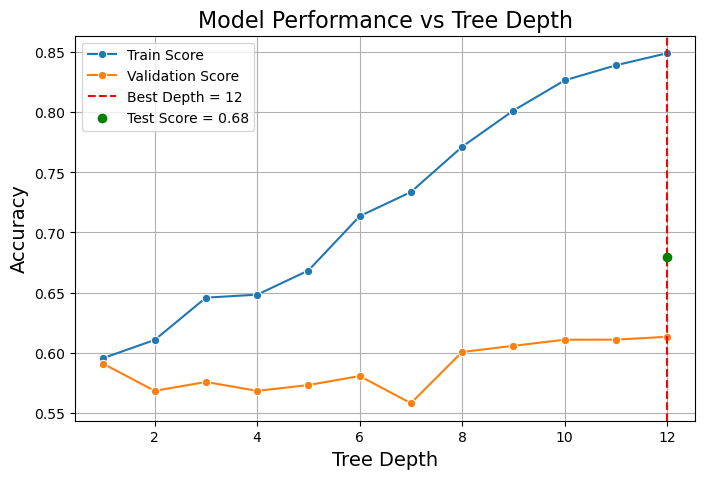

In [49]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=depth_range, y=train_scores, label='Train Score', marker='o')
sns.lineplot(x=depth_range, y=val_scores, label='Validation Score', marker='o')

plt.axvline(x=best_depth, color='r', linestyle='--', label=f'Best Depth = {best_depth}')
plt.scatter([best_depth], [test_score], color='green', label=f'Test Score = {test_score:.2f}', zorder=5)

plt.xlabel('Tree Depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Performance vs Tree Depth', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

In [50]:
feature_importance_math = pd.DataFrame({
    'Feature': features,
    'Importance': best_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_math)


Feature Importance:
    Feature  Importance
2      Medu    0.233456
3      Fedu    0.224040
1    famrel    0.156043
6  guardian    0.124460
4   famsize    0.119251
0    famsup    0.081691
5   Pstatus    0.061059


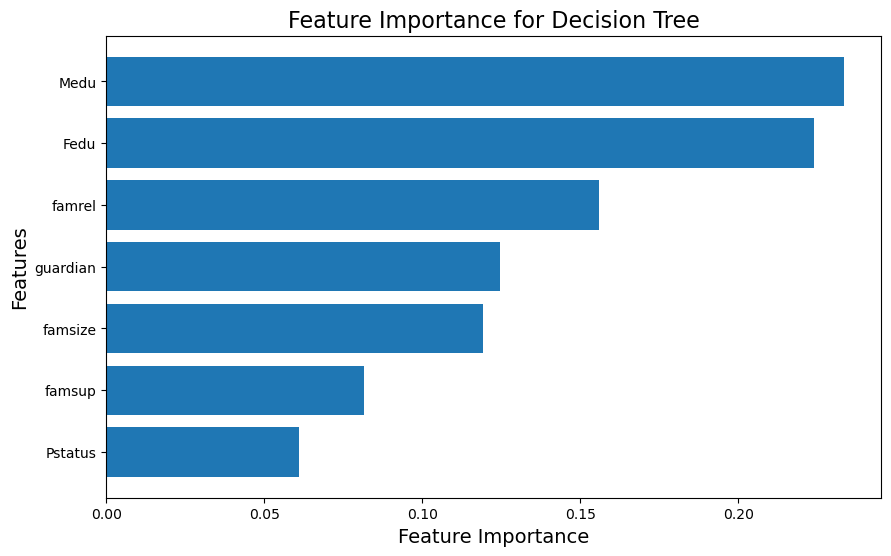

In [51]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_math['Feature'], feature_importance_math['Importance'])
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance for Decision Tree', fontsize=16)
plt.gca().invert_yaxis()  
plt.show()

In [52]:
y_pred_math = best_tree.predict(X_test_math)

test_score = best_tree.score(X_test_math, y_test_math)
print(f"Test Score: {test_score:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_math, y_pred_math, target_names=["Fail", "Pass"]))

Test Score: 0.68

Classification Report:
              precision    recall  f1-score   support

        Fail       0.64      0.84      0.72        50
        Pass       0.76      0.52      0.62        50

    accuracy                           0.68       100
   macro avg       0.70      0.68      0.67       100
weighted avg       0.70      0.68      0.67       100



### Portuguese

In [53]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=88)

X_resampled_port, y_resampled_port = smote.fit_resample(family_featrues, y_port)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_port, y_resampled_port, test_size=0.2, random_state=42)

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

train_scores = []
val_scores = []
depth_range = range(1, 13)

for depth in depth_range:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    val_score = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')
    train_scores.append(tree.fit(X_train, y_train).score(X_train, y_train))
    val_scores.append(np.mean(val_score))

best_depth = depth_range[np.argmax(val_scores)]
print(f"Best depth: {best_depth}")

Best depth: 12


In [56]:
best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_tree.fit(X_train, y_train)

test_score = best_tree.score(X_test, y_test)
print(f"Test Score at Best Depth ({best_depth}): {test_score:.2f}")

Test Score at Best Depth (12): 0.89


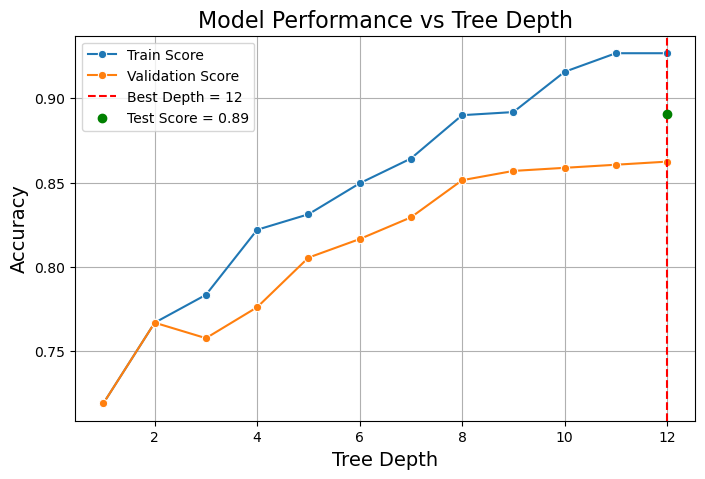

In [57]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=depth_range, y=train_scores, label='Train Score', marker='o')
sns.lineplot(x=depth_range, y=val_scores, label='Validation Score', marker='o')

plt.axvline(x=best_depth, color='r', linestyle='--', label=f'Best Depth = {best_depth}')
plt.scatter([best_depth], [test_score], color='green', label=f'Test Score = {test_score:.2f}', zorder=5)

plt.xlabel('Tree Depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Performance vs Tree Depth', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

In [58]:
feature_importance_port = pd.DataFrame({
    'Feature': features,
    'Importance': best_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_port)


Feature Importance:
    Feature  Importance
0    famsup    0.242163
2      Medu    0.205970
1    famrel    0.192235
3      Fedu    0.126446
6  guardian    0.121080
4   famsize    0.056631
5   Pstatus    0.055476


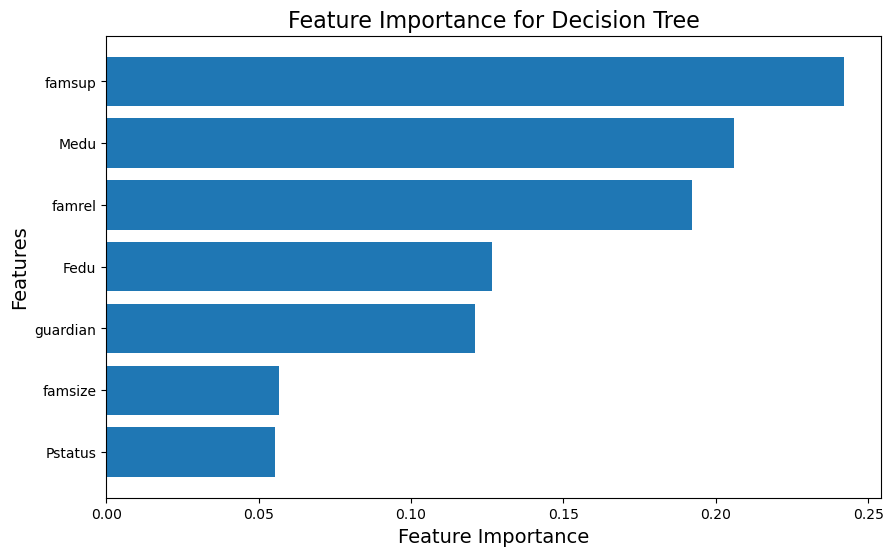

In [59]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_port['Feature'], feature_importance_port['Importance'])
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance for Decision Tree', fontsize=16)
plt.gca().invert_yaxis()  
plt.show()

In [60]:
y_pred = best_tree.predict(X_test)

test_score = best_tree.score(X_test, y_test)
print(f"Test Score: {test_score:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Fail", "Pass"]))

Test Score: 0.89

Classification Report:
              precision    recall  f1-score   support

        Fail       0.78      0.98      0.87        52
        Pass       0.99      0.84      0.90        85

    accuracy                           0.89       137
   macro avg       0.89      0.91      0.89       137
weighted avg       0.91      0.89      0.89       137



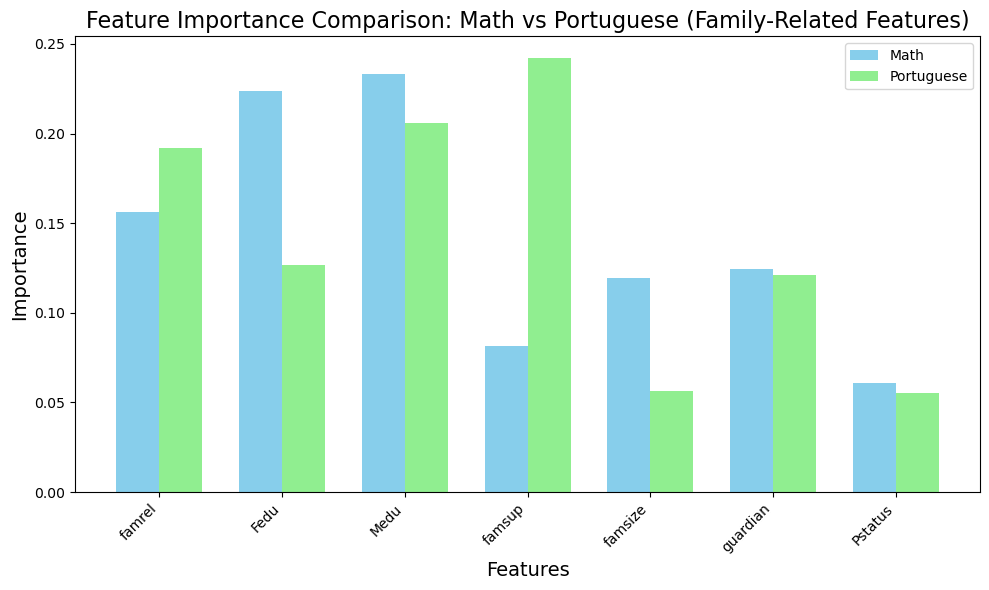

In [61]:
features = ['famrel', 'Fedu', 'Medu', 'famsup', 'famsize', 'guardian', 'Pstatus']

math_importance = feature_importance_math.set_index('Feature').reindex(features)['Importance']
port_importance = feature_importance_port.set_index('Feature').reindex(features)['Importance']

math_importance = math_importance.fillna(0)
port_importance = port_importance.fillna(0)

bar_width = 0.35
index = np.arange(len(features))

plt.figure(figsize=(10, 6))

plt.bar(index, math_importance, bar_width, label='Math', color='skyblue')
plt.bar(index + bar_width, port_importance, bar_width, label='Portuguese', color='lightgreen')

plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importance Comparison: Math vs Portuguese (Family-Related Features)', fontsize=16)
plt.xticks(index + bar_width / 2, features, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

### Model 3: Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, roc_curve, auc

### Math

Best C (Regularization Strength): 0.001
Test Score: 0.49

Classification Report:
              precision    recall  f1-score   support

        Fail       0.49      0.54      0.51        50
        Pass       0.49      0.44      0.46        50

    accuracy                           0.49       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.49      0.49      0.49       100



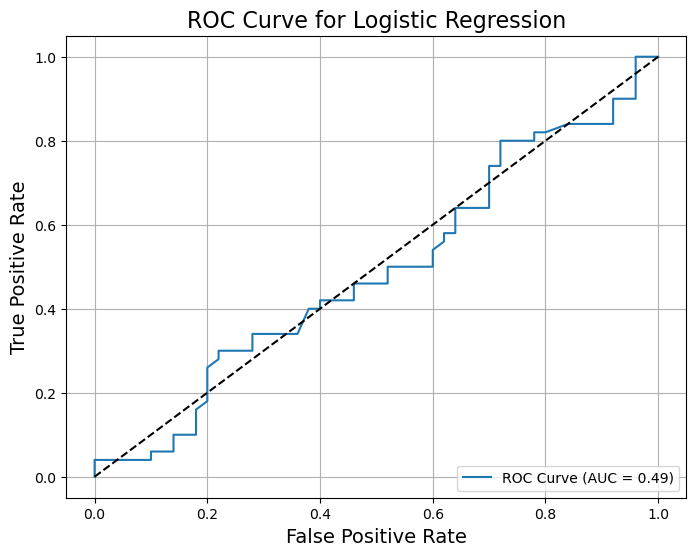

In [63]:
C_values = np.logspace(-3, 3, 10)  
val_scores = []

for C in C_values:
    logistic = LogisticRegression(C=C, random_state=42, max_iter=500, solver='lbfgs')
    val_score = cross_val_score(logistic, X_train_math, y_train_math, cv=5, scoring='accuracy')
    val_scores.append(np.mean(val_score))

best_C = C_values[np.argmax(val_scores)]
print(f"Best C (Regularization Strength): {best_C:.3f}")

best_logistic = LogisticRegression(C=best_C, random_state=42, max_iter=500, solver='lbfgs')
best_logistic.fit(X_train_math, y_train_math)

y_pred_math = best_logistic.predict(X_test_math)
test_score = best_logistic.score(X_test_math, y_test_math)
print(f"Test Score: {test_score:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_math, y_pred_math, target_names=["Fail", "Pass"]))

y_prob_math = best_logistic.predict_proba(X_test_math)[:, 1]  
fpr_math, tpr_math, thresholds_math = roc_curve(y_test_math, y_prob_math)
roc_auc_math = auc(fpr_math, tpr_math)

plt.figure(figsize=(8, 6))
plt.plot(fpr_math, tpr_math, label=f'ROC Curve (AUC = {roc_auc_math:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for Logistic Regression', fontsize=16)
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Portuguese

Best C (Regularization Strength): 46.416
Test Score: 0.78

Classification Report:
              precision    recall  f1-score   support

        Fail       0.67      0.85      0.75        52
        Pass       0.89      0.74      0.81        85

    accuracy                           0.78       137
   macro avg       0.78      0.79      0.78       137
weighted avg       0.80      0.78      0.78       137



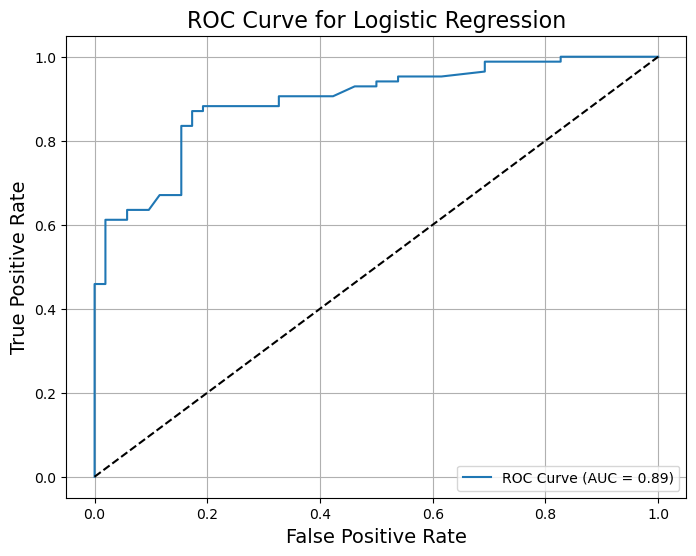

In [64]:
val_scores = []

for C in C_values:
    logistic = LogisticRegression(C=C, random_state=42, max_iter=500, solver='lbfgs')
    val_score = cross_val_score(logistic, X_train, y_train, cv=5, scoring='accuracy')
    val_scores.append(np.mean(val_score))

best_C = C_values[np.argmax(val_scores)]
print(f"Best C (Regularization Strength): {best_C:.3f}")

best_logistic = LogisticRegression(C=best_C, random_state=42, max_iter=500, solver='lbfgs')
best_logistic.fit(X_train, y_train)

y_pred = best_logistic.predict(X_test)
test_score = best_logistic.score(X_test, y_test)
print(f"Test Score: {test_score:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Fail", "Pass"]))

y_prob = best_logistic.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for Logistic Regression', fontsize=16)
plt.legend(loc='lower right')
plt.grid()
plt.show()

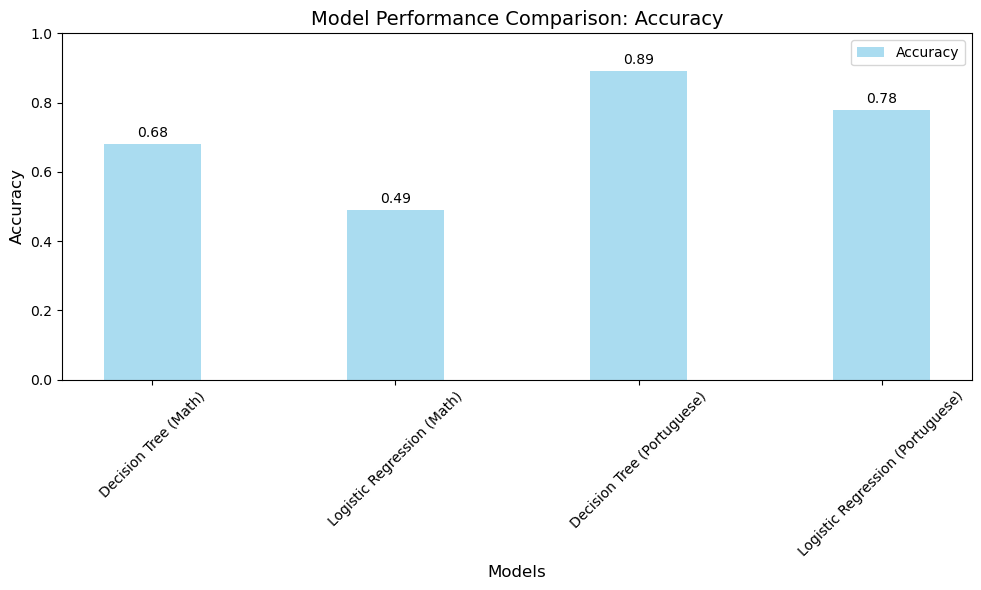

In [65]:
models = ['Decision Tree (Math)', 'Logistic Regression (Math)', 
          'Decision Tree (Portuguese)', 'Logistic Regression (Portuguese)']
accuracy = [0.68, 0.49, 0.89, 0.78]

x = np.arange(len(models)) 

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.4

bar1 = ax.bar(x, accuracy, width, label='Accuracy', color='skyblue', alpha=0.7)

for i, v in enumerate(accuracy):
    ax.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)

plt.ylim(0, 1)

plt.xticks(x, models, rotation=45, fontsize=10)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Performance Comparison: Accuracy', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()